# Grocery Store Sales Data Analysis

## Overview
This Project is centered around analyzing sales data from a chain of grocery stores in Maharashtra. By examining various parameters such as item categories, sales volume, profit margins, and customer ratings, we aim to glean insights that can aid in optimizing inventory management and sales strategies.

## Objective
The goal is to identify trends in sales data that will inform better inventory decisions, highlight profitable items, and understand customer preferences.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

### Import and read dataset

In [5]:
df = pd.read_csv(r'C:\Users\Mi\Downloads\Grocery_sales_dataset.csv',index_col=0)
df.head()

,product_name,category,price,sales_date,day_of_week,holiday,number_of_items_sold,total_revenue,sales_time,product_id,buyer_gender
0,Milk packet,Dairy,80,2022-09-01,Thursday,False,18,1440,07:58,1022,Men
1,Bread package,Bakery,55,2022-09-01,Thursday,False,8,440,12:00,1011,Men
2,Butter,Dairy,285,2022-09-01,Thursday,False,15,4275,19:56,1078,Women
3,Milk packet,Dairy,80,2022-09-01,Thursday,False,12,960,09:21,1022,Men
4,Bread package,Bakery,55,2022-09-01,Thursday,False,16,880,07:22,1011,Men


# ------------------------------------------------------------------------

## Data Exploration

#### Display the first few rows of the DataFrame.

In [73]:
df.head()

,product_name,category,price,sales_date,day_of_week,holiday,number_of_items_sold,total_revenue,sales_time,product_id,buyer_gender
0,Milk packet,Dairy,80,2022-09-01,Thursday,False,18,1440,07:58,1022,Men
1,Bread package,Bakery,55,2022-09-01,Thursday,False,8,440,12:00,1011,Men
2,Butter,Dairy,285,2022-09-01,Thursday,False,15,4275,19:56,1078,Women
3,Milk packet,Dairy,80,2022-09-01,Thursday,False,12,960,09:21,1022,Men
4,Bread package,Bakery,55,2022-09-01,Thursday,False,16,880,07:22,1011,Men


#### Display information about a DataFrame including the index dtype and columns, non-null values and memory usage.


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22321 entries, 0 to 22320
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   product_name          22321 non-null  object
 1   category              22321 non-null  object
 2   price                 22321 non-null  int64 
 3   sales_date            22321 non-null  object
 4   day_of_week           22321 non-null  object
 5   holiday               22321 non-null  bool  
 6   number_of_items_sold  22321 non-null  int64 
 7   total_revenue         22321 non-null  int64 
 8   sales_time            22321 non-null  object
 9   product_id            22321 non-null  int64 
 10  buyer_gender          22321 non-null  object
dtypes: bool(1), int64(4), object(6)
memory usage: 1.9+ MB


#### Display Statistical summary of numeric columns


In [75]:
df.describe()

,price,number_of_items_sold,total_revenue,product_id
count,22321.000000,22321.000000,22321.000000,22321.000000
mean,179.557233,11.478697,2042.458223,1048.263698
std,116.043786,9.279767,2229.649949,31.083915
min,55.000000,1.000000,55.000000,1011.000000
25%,80.000000,6.000000,605.000000,1022.000000
50%,134.000000,11.000000,1206.000000,1041.000000
75%,285.000000,16.000000,2800.000000,1078.000000
max,350.000000,144.000000,25200.000000,1091.000000


#### Display series containing the frequency of each distinct row in the Dataframe for each categorical column.


In [76]:
df['category'].value_counts()

Dairy      13454
Bakery      4531
Grocery     4336
Name: category, dtype: int64

In [77]:
df['product_name'].value_counts()

Bread package    4531
Milk packet      4529
Butter           4522
Eggs             4403
Jam jar          4336
Name: product_name, dtype: int64

In [78]:
df['day_of_week'].value_counts()

Sunday       5080
Saturday     4973
Tuesday      2560
Monday       2476
Thursday     2467
Wednesday    2414
Friday       2351
Name: day_of_week, dtype: int64

In [79]:
df

,product_name,category,price,sales_date,day_of_week,holiday,number_of_items_sold,total_revenue,sales_time,product_id,buyer_gender
0,Milk packet,Dairy,80,2022-09-01,Thursday,False,18,1440,07:58,1022,Men
1,Bread package,Bakery,55,2022-09-01,Thursday,False,8,440,12:00,1011,Men
2,Butter,Dairy,285,2022-09-01,Thursday,False,15,4275,19:56,1078,Women
3,Milk packet,Dairy,80,2022-09-01,Thursday,False,12,960,09:21,1022,Men
4,Bread package,Bakery,55,2022-09-01,Thursday,False,16,880,07:22,1011,Men
...,...,...,...,...,...,...,...,...,...,...,...
22316,Butter,Dairy,285,2023-11-30,Thursday,False,32,9120,08:55,1078,Women
22317,Eggs,Dairy,134,2023-11-30,Thursday,False,28,3752,19:53,1041,Women
22318,Bread package,Bakery,55,2023-11-30,Thursday,False,14,770,10:44,1011,Men
22319,Jam jar,Grocery,350,2023-11-30,Thursday,False,8,2800,09:23,1091,Men


# -----------------------------------------------------------------

## Advanced Data Analysis

#### Show the counts of observations in category and product

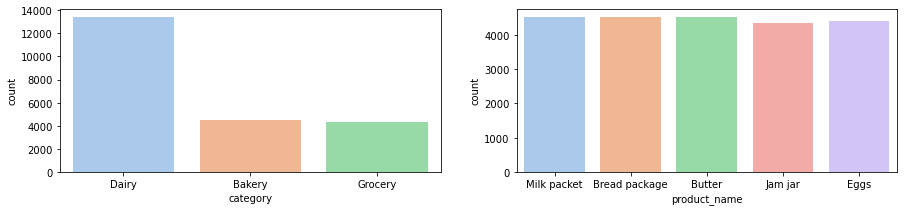

In [7]:
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
sns.countplot(x='category', data=df,palette="pastel")
plt.subplot(1,2,2)
sns.countplot(x='product_name', data=df,palette="pastel")
plt.show()

####  Visualize average number of items sold for each category and product


<AxesSubplot:xlabel='category', ylabel='price'>

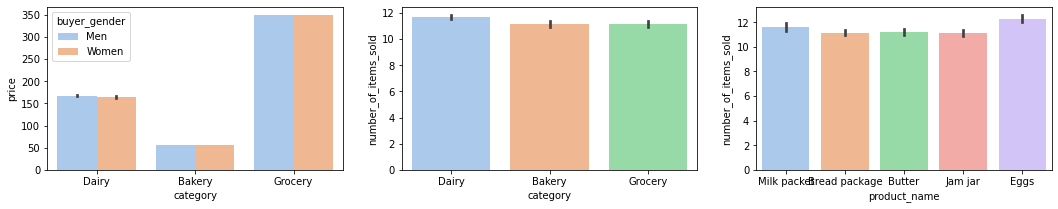

In [15]:
plt.figure(figsize=(18,3))
plt.subplot(1,3,2)
sns.barplot(x='category', y='number_of_items_sold', data=df,palette='pastel')
plt.subplot(1,3,3)
sns.barplot(x='product_name', y='number_of_items_sold', data=df,palette='pastel')
plt.subplot(1,3,1)
sns.barplot(x='category', y='price',hue='buyer_gender', data=df,palette='pastel')

###Visualize Average number of items sold  and total revenue on each day

<AxesSubplot:xlabel='day_of_week', ylabel='total_revenue'>

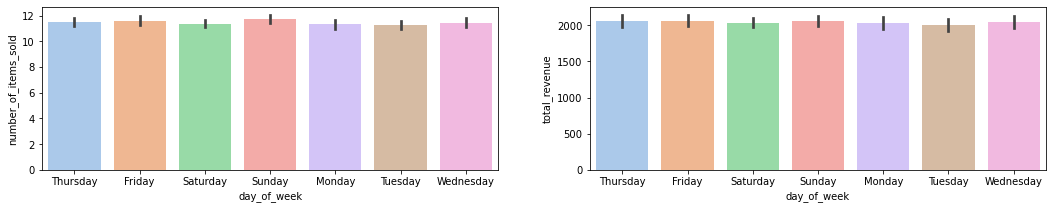

In [12]:
plt.figure(figsize=(18,3))
plt.subplot(1,2,1)
sns.barplot(x='day_of_week', y='number_of_items_sold', data=df,palette='pastel')
plt.subplot(1,2,2)
sns.barplot(x='day_of_week', y='total_revenue', data=df,palette='pastel')

### Visualizing relation between total revenue and number of items sold
#### **mark each category and product with different colors using ```hue```**

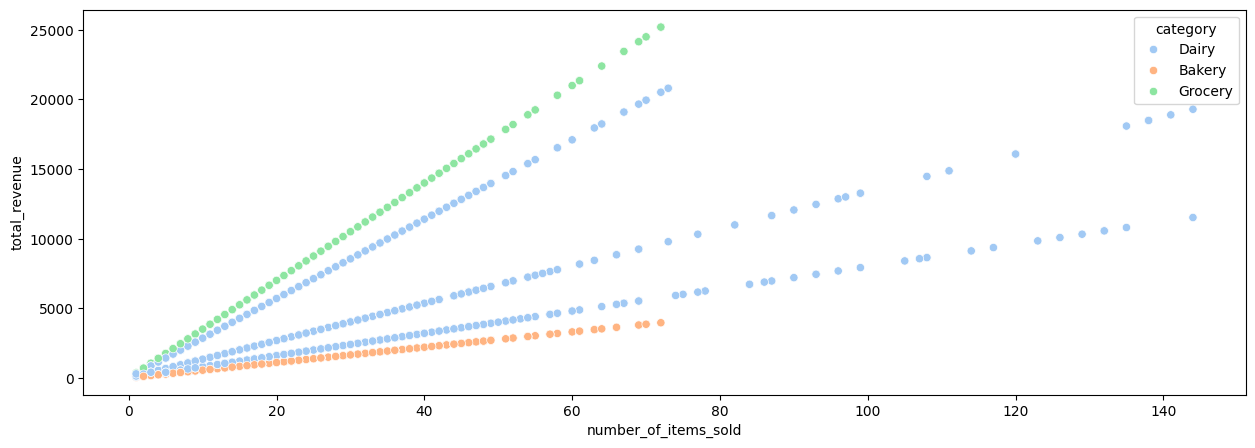

In [83]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x='number_of_items_sold', y='total_revenue',hue='category', data=df,palette='pastel')
plt.show()

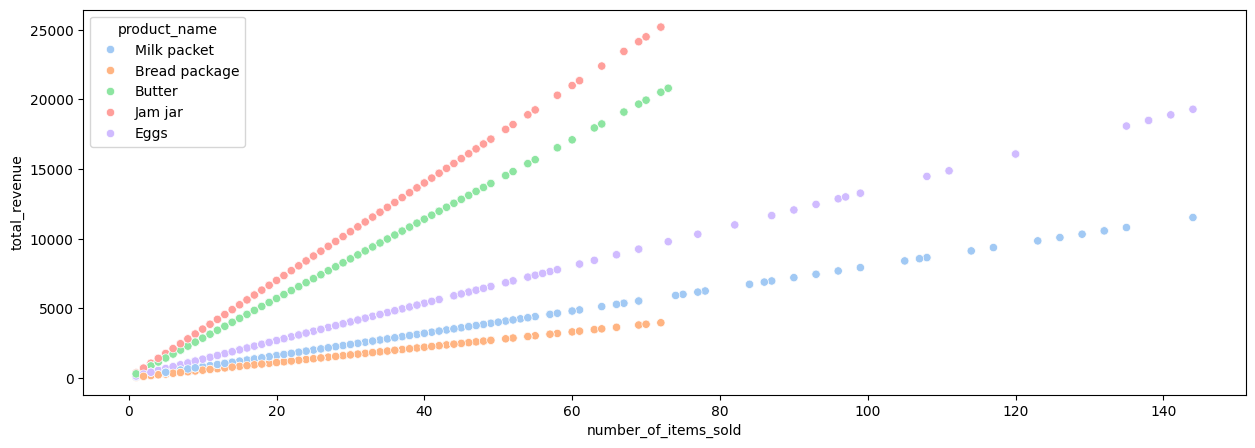

In [84]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x='number_of_items_sold', y='total_revenue',hue='product_name', data=df,palette='pastel')
plt.show()


### Visualizing distribution of category with number of items sold

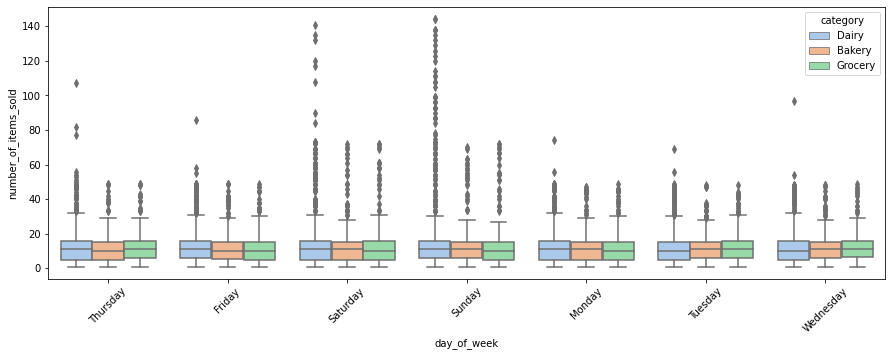

In [16]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='day_of_week', y='number_of_items_sold',hue='category', data=df,palette="pastel")
plt.xticks(rotation=45)
plt.show()

### Visualize average sales by sales hours, months and days

In [121]:
df['sales_time'].head()

0    07:58
1    12:00
2    19:56
3    09:21
4    07:22
Name: sales_time, dtype: object

In [122]:
df['hours']=df['sales_time'].str.split(":").str[0] ### seperate hour from hour and minutes
df['hours'].head()

0    07
1    12
2    19
3    09
4    07
Name: hours, dtype: object

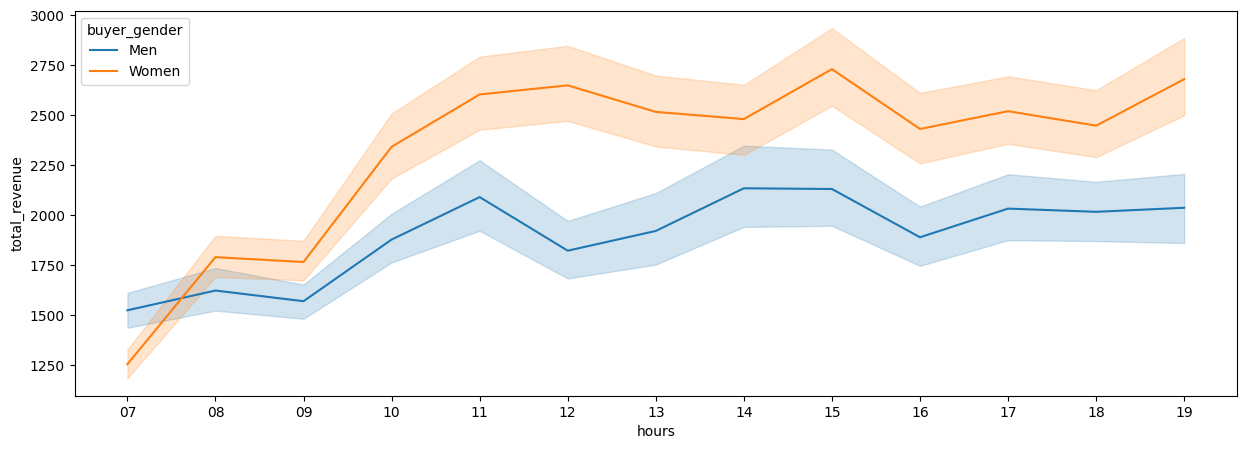

In [156]:
plt.figure(figsize=(15, 5))
sns.lineplot(x='hours',y='total_revenue',data=df.sort_values('hours'),hue='buyer_gender')
plt.show()

In [155]:
df['year'],df['month'],df['day'] = df['sales_date'].str.split("-").str
df.head()

,product_name,category,price,sales_date,day_of_week,holiday,number_of_items_sold,total_revenue,sales_time,product_id,buyer_gender,year,month,day,hours
0,Milk packet,Dairy,80,2022-09-01,Thursday,False,18,1440,07:58,1022,Men,2022,09,01,07
1,Bread package,Bakery,55,2022-09-01,Thursday,False,8,440,12:00,1011,Men,2022,09,01,12
2,Butter,Dairy,285,2022-09-01,Thursday,False,15,4275,19:56,1078,Women,2022,09,01,19
3,Milk packet,Dairy,80,2022-09-01,Thursday,False,12,960,09:21,1022,Men,2022,09,01,09
4,Bread package,Bakery,55,2022-09-01,Thursday,False,16,880,07:22,1011,Men,2022,09,01,07


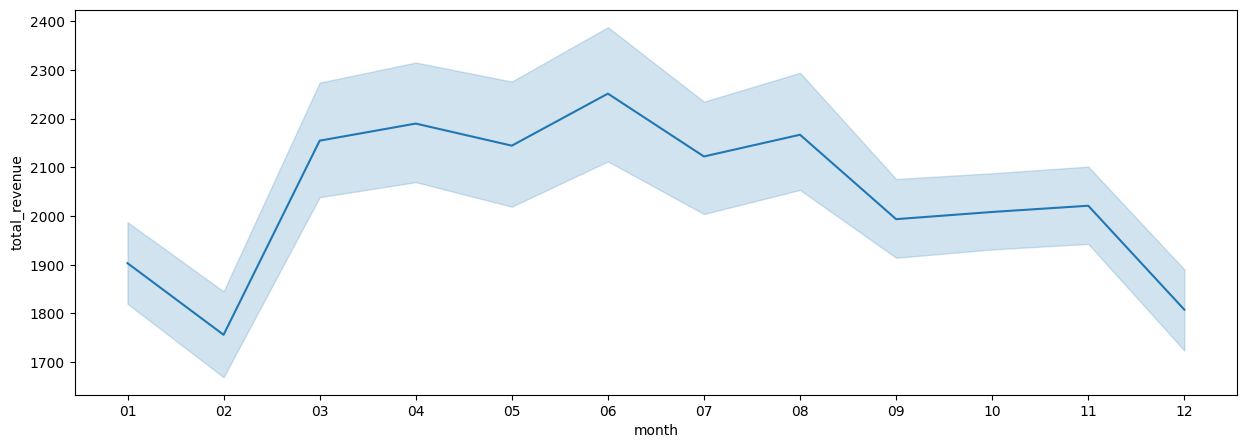

In [162]:
plt.figure(figsize=(15, 5))
sns.lineplot(x='month',y='total_revenue',data=df.sort_values('month'))
plt.show()

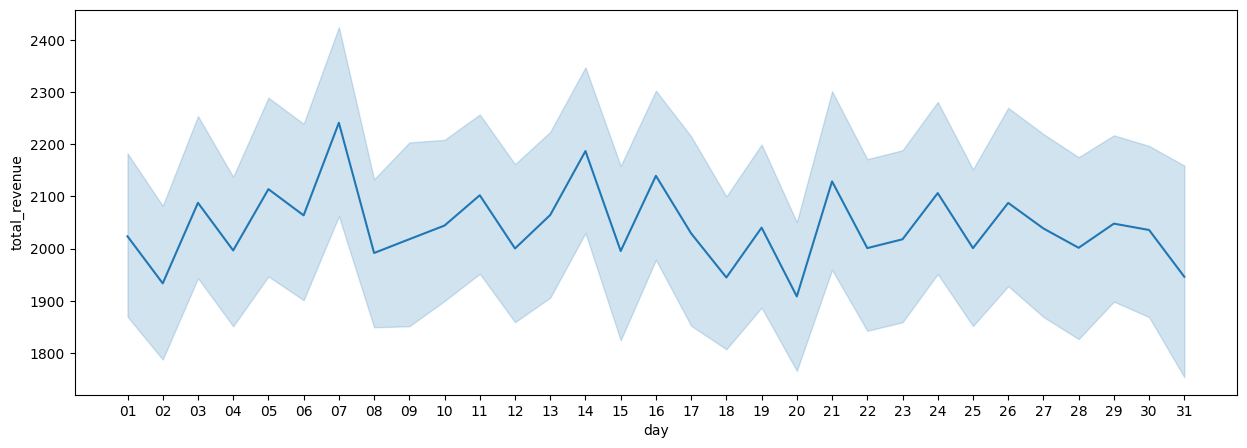

In [159]:
plt.figure(figsize=(15, 5))
sns.lineplot(x='day',y='total_revenue',data=df.sort_values('day'))
plt.show()

## Conclusion
